In [1]:
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
terrdf = pd.read_excel("gtd_cleaned_data.xlsx")


In [3]:
terrdf.head()

,Unnamed: 0,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,...,hostkidoutcome_txt,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related,apprx_start_date,apprx_end_date,idate
0,0,197000000001,1970,7,2,NaN,0,NaT,58,Dominican Republic,...,Unknown,-99,0,0,0,0,NaN,NaT,NaT,1970-07-02
1,1,197000000002,1970,1,1,NaN,0,NaT,130,Mexico,...,Unknown,-99,0,1,1,1,NaN,NaT,NaT,1970-01-01
2,2,197001000001,1970,1,1,NaN,0,NaT,160,Philippines,...,Unknown,-99,-9,-9,1,1,NaN,NaT,NaT,1970-01-01
3,3,197001000002,1970,1,1,NaN,0,NaT,78,Greece,...,Unknown,-99,-9,-9,1,1,NaN,NaT,NaT,1970-01-01
4,4,197001000003,1970,1,1,NaN,0,NaT,101,Japan,...,Unknown,-99,-9,-9,1,1,NaN,NaT,NaT,1970-01-01


In [4]:
terrdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209706 entries, 0 to 209705
Data columns (total 78 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Unnamed: 0          209706 non-null  int64         
 1   eventid             209706 non-null  int64         
 2   iyear               209706 non-null  int64         
 3   imonth              209706 non-null  int64         
 4   iday                209706 non-null  int64         
 5   approxdate          12689 non-null   object        
 6   extended            209706 non-null  int64         
 7   resolution          4861 non-null    datetime64[ns]
 8   country             209706 non-null  int64         
 9   country_txt         209706 non-null  object        
 10  region              209706 non-null  int64         
 11  region_txt          209706 non-null  object        
 12  provstate           209706 non-null  object        
 13  city                209706 no

In [5]:
terrdf_grp_by_date = terrdf.groupby(terrdf.idate.dt.year)

In [6]:
terrdf_by_date = terrdf_grp_by_date.eventid.count()

In [7]:
terrdf_by_date = pd.DataFrame({'terr_events':terrdf_by_date}, index=terrdf_by_date.index)

In [8]:
terrdf_by_date["rolling_mean"] = terrdf_by_date.terr_events.rolling(2).mean()

In [9]:
terrdf_by_date.head()

,terr_events,rolling_mean
idate,,
1970,651,NaN
1971,471,561.0
1972,567,519.0
1973,473,520.0
1974,581,527.0


In [10]:
terrdf_by_date.index

Index([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1994,
       1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
       2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
       2019, 2020],
      dtype='int32', name='idate')

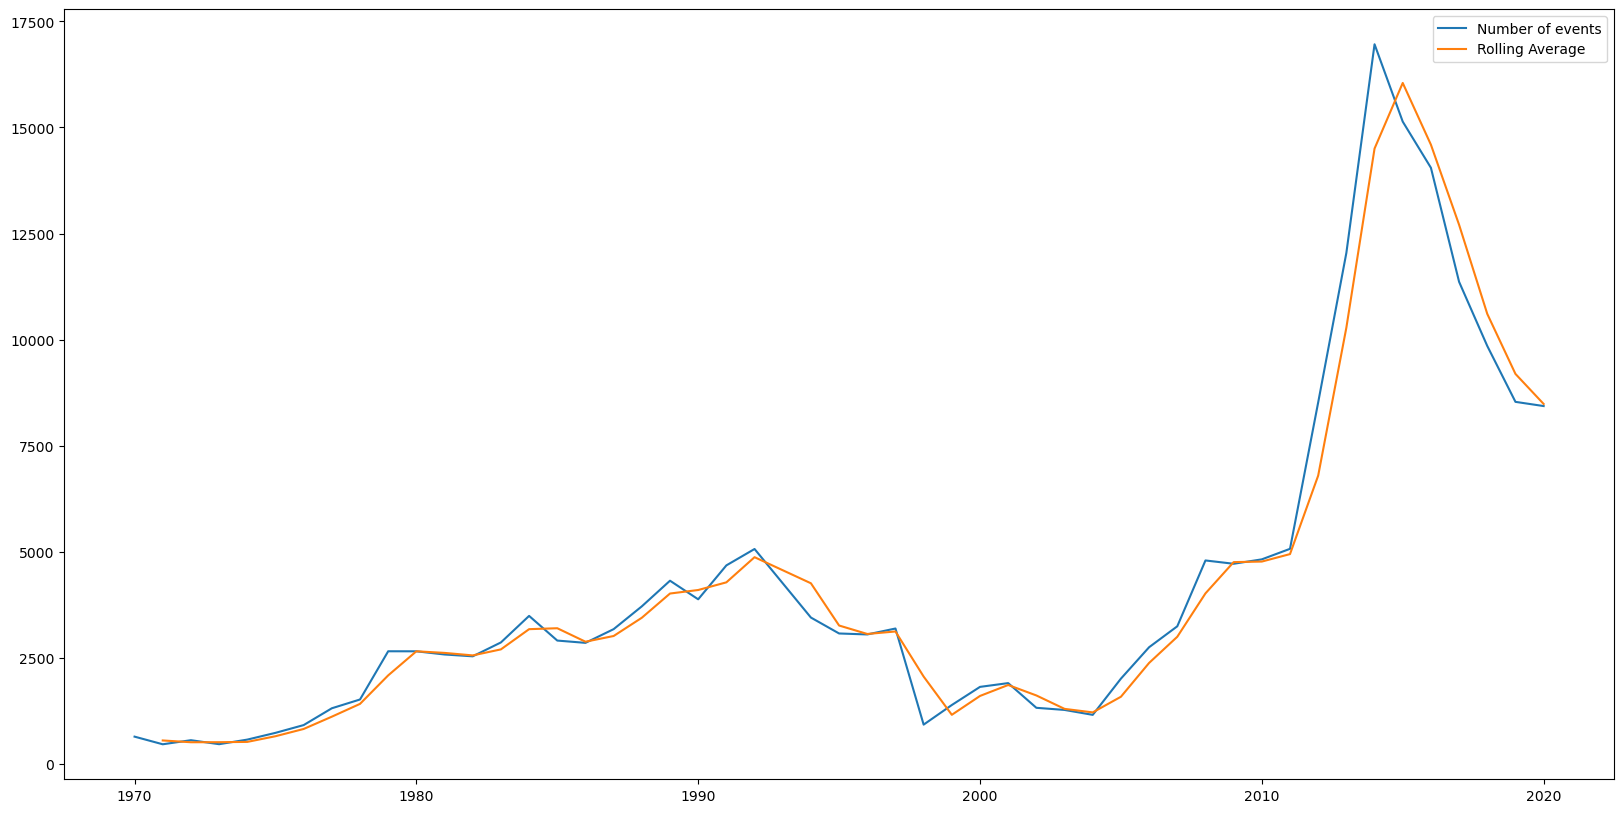

In [11]:
# Number of events per year
plt.figure(figsize=(20,10))
plt.plot(terrdf_by_date.index, terrdf_by_date.terr_events, label="Number of events")
plt.plot(terrdf_by_date.index, terrdf_by_date.rolling_mean, label="Rolling Average")
plt.legend()
plt.show()

In [12]:
terrdf_grp_by_region = terrdf.groupby(terrdf.region_txt)

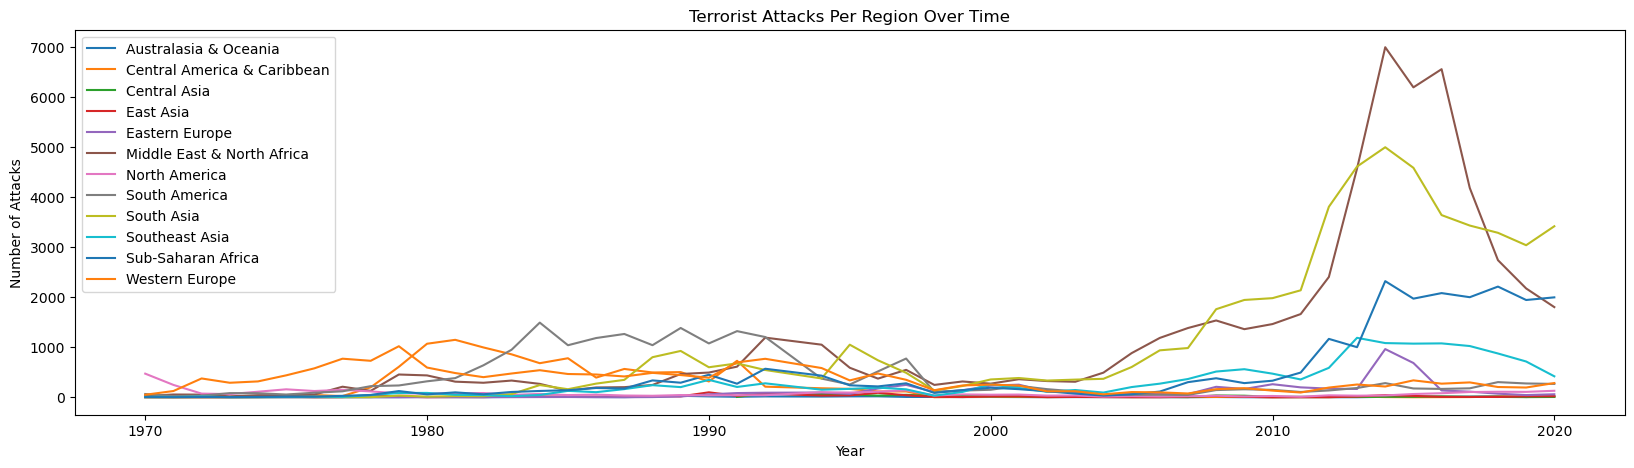

In [13]:
# Terrorist attacks per regoin

plt.figure(figsize=(20,5))

for region, regiondf in terrdf_grp_by_region:
    # Group by year and count a specific column, e.g., 'id' or another column
    regiondf_by_date = regiondf.groupby(regiondf.idate.dt.year).count()['eventid']
    
    plt.plot(regiondf_by_date.index, regiondf_by_date, label=region)

plt.legend()
plt.title("Terrorist Attacks Per Region Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Attacks")
plt.show()


In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose
terrdf_80to90 = terrdf.loc[(terrdf.idate.dt.year >= 1980) & (terrdf.idate.dt.year < 1989)]

terr_atks_by_month_80to90 = terrdf_80to90.groupby([terrdf_80to90.idate.dt.year, terrdf_80to90.idate.dt.month])['eventid'].count()

terr_atks_by_month_80to90.index = pd.date_range(start='1980-01', periods=len(terr_atks_by_month_80to90), freq='M')

from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(terr_atks_by_month_80to90)
print(f"ADF Statistic : {adf_result[0]}")
print(f"p-value : {adf_result[1]}")

if adf_result[1] < 0.05:
    print("Stationary.")
else:
    print("Non-stationary")

ADF Statistic : -4.570560649685724
p-value : 0.00014630748157904157
Stationary.


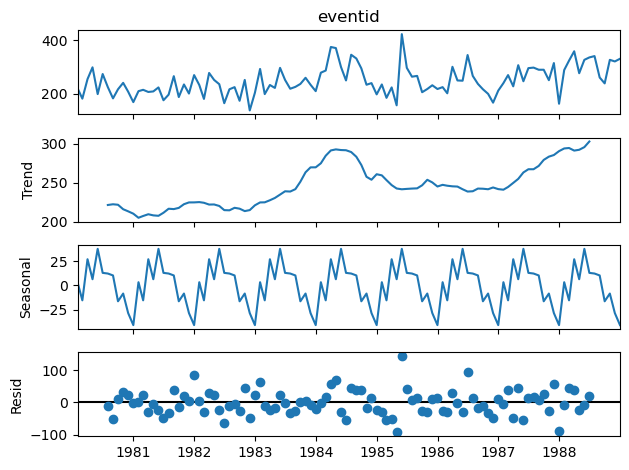

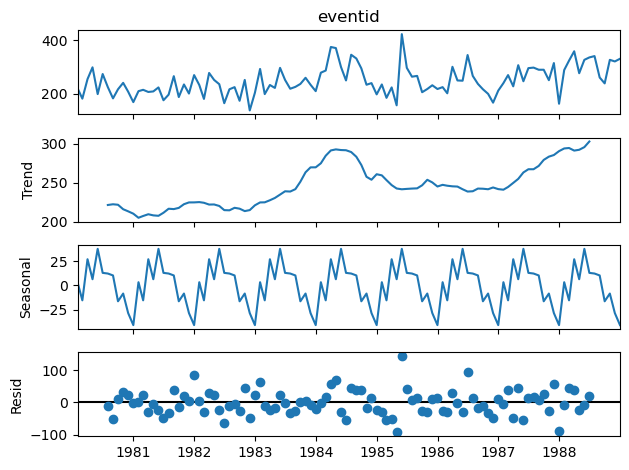

In [15]:
# plot decomposition
decomposition = seasonal_decompose(terr_atks_by_month_80to90, model='additive')

decomposition.plot()

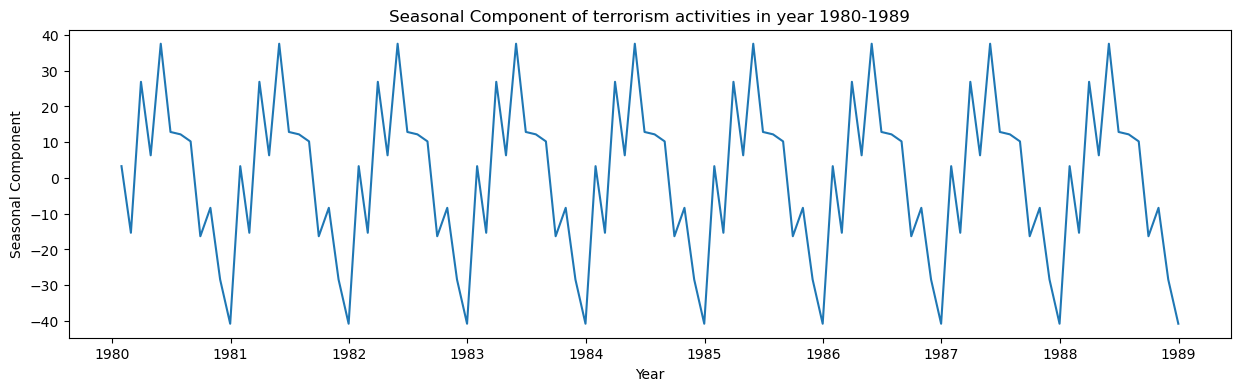

In [16]:
# Seasonality
plt.figure(figsize=(15, 4))
plt.plot(decomposition.seasonal)
plt.title('Seasonal Component of terrorism activities in year 1980-1989')
plt.xlabel('Year')
plt.ylabel('Seasonal Component')
plt.show()


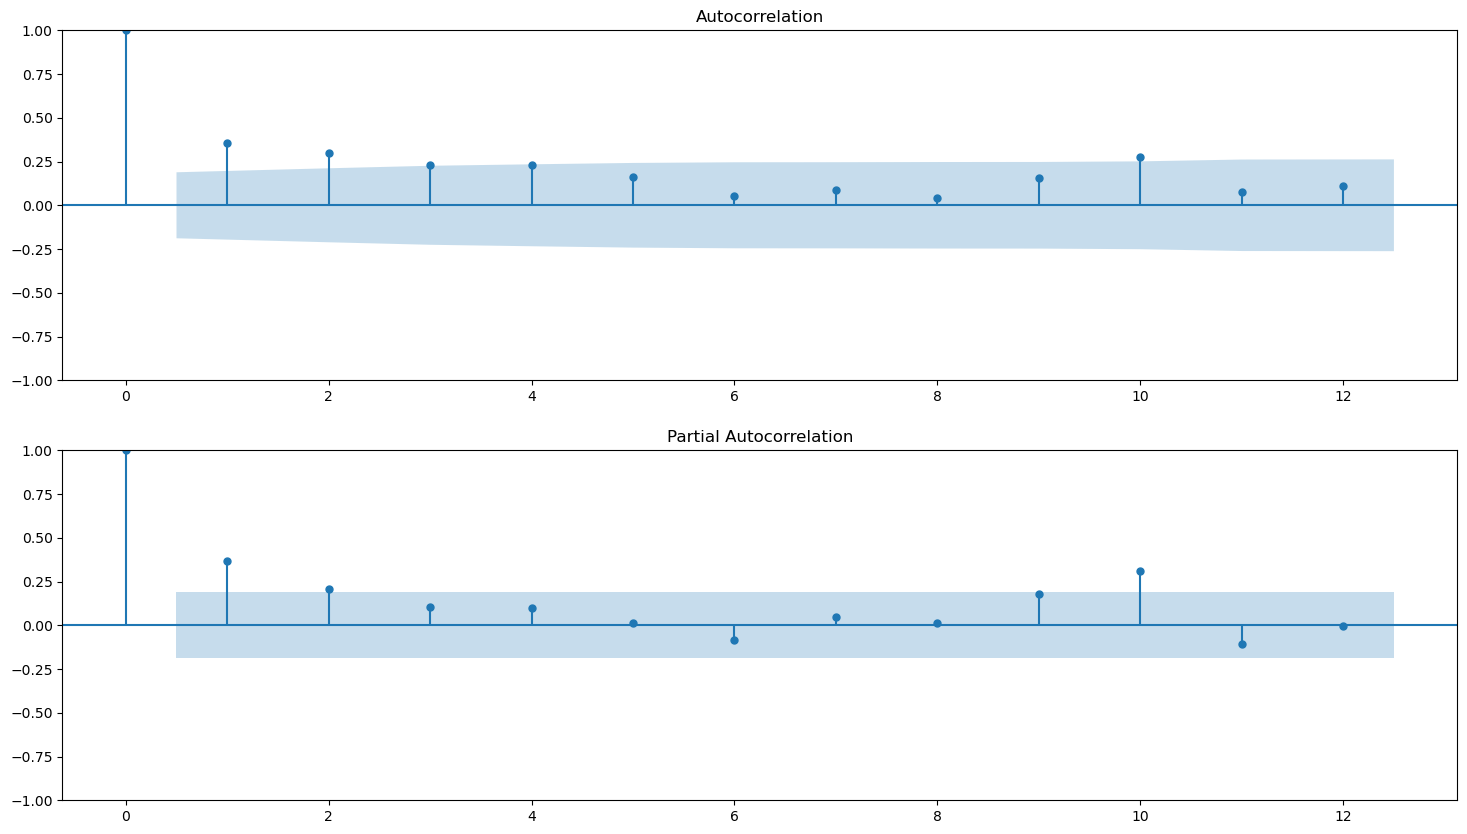

In [17]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

f, ax = plt.subplots(nrows=2, ncols=1, figsize=(18, 10))
plot_acf(terr_atks_by_month_80to90,lags=12, ax=ax[0])
plot_pacf(terr_atks_by_month_80to90,lags=12, ax=ax[1], method='ols')

# plt.tight_layout()
plt.show()

In [18]:
# Using SARIMAX and ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA

p,d,q,m = 1,1,1,12


model_sarimax = SARIMAX(terr_atks_by_month_80to90, 
                order=(p, d, q), 
                seasonal_order=(p, d, q, m))

model_arima = ARIMA(terr_atks_by_month_80to90, order=(1, 1, 1))

In [19]:
model_fit_sarimax = model_sarimax.fit(disp=False)
model_fit_arima = model_arima.fit()

C:\Users\kunal\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [20]:
# Forecast the next 5 years (60 months)
n_months = 5 * 12
forecast_sarimax = model_fit_sarimax.get_forecast(steps=n_months)
forecast_arima = model_fit_arima.get_forecast(steps=n_months)

In [21]:
# Create date index for the forecast
forecast_index = pd.date_range(start=pd.to_datetime("1990-01-01"), periods=n_months+1, freq='M')[1:]

In [23]:
# Convert the forecast to a Pandas Series
forecast_series_sarimax = pd.Series(forecast_sarimax.predicted_mean.values, index=forecast_index)
forecast_series_arima = pd.Series(forecast_arima.predicted_mean.values, index=forecast_index)

# Get confidence intervals
confidence_intervals_sarimax = forecast_sarimax.conf_int()
confidence_intervals_arima = forecast_arima.conf_int()

In [24]:
# Real Values for 1990 - 1995
terrdf_90to95 = terrdf.loc[(terrdf.idate.dt.year >= 1990) & (terrdf.idate.dt.year <= 1995)]

terr_atks_by_month_90to95 = terrdf_90to95.groupby([terrdf_90to95.idate.dt.year, terrdf_90to95.idate.dt.month])['eventid'].count()

terr_atks_by_month_90to95.index = pd.date_range(start='1990-01', periods=len(terr_atks_by_month_90to95), freq='M')

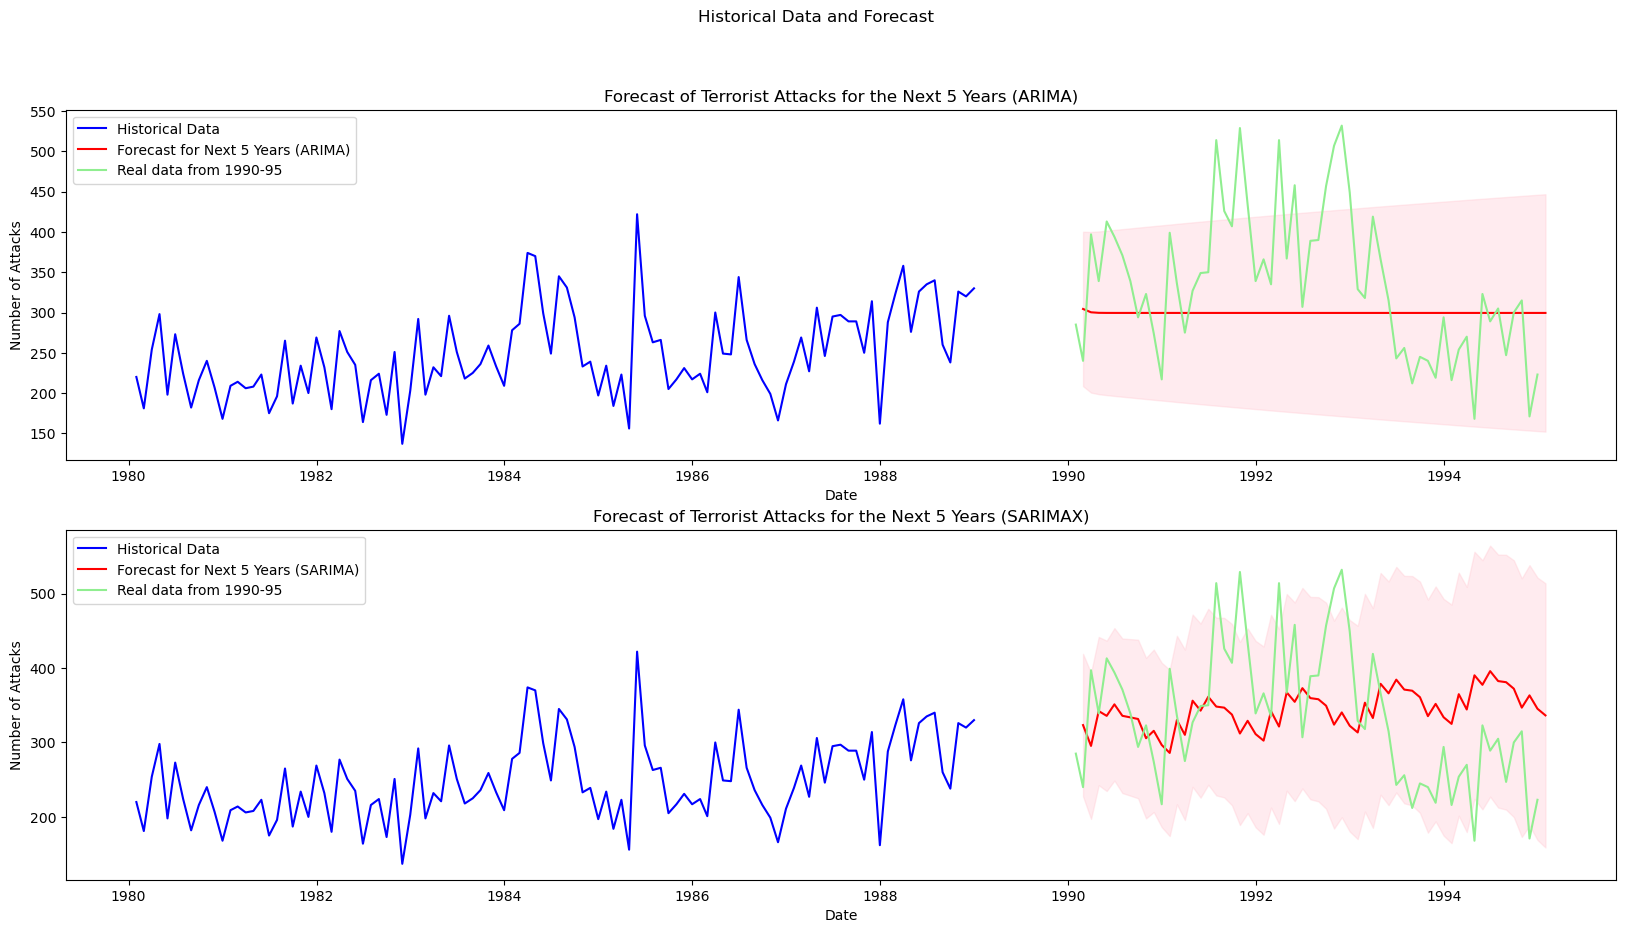

In [25]:
# Plotting the historical data and the forecast for ARIMA and SARIMAX
fig, axs = plt.subplots(2, 1, figsize=(20, 10))  # Increase figsize for wider plots
fig.suptitle("Historical Data and Forecast")

axs[0].plot(terr_atks_by_month_80to90, label='Historical Data', color='blue')
axs[0].plot(forecast_series_arima, label='Forecast for Next 5 Years (ARIMA)', color='red')
axs[0].plot(terr_atks_by_month_90to95, label='Real data from 1990-95', color='lightgreen')
axs[0].fill_between(forecast_index, confidence_intervals_arima.iloc[:, 0], confidence_intervals_arima.iloc[:, 1], color='pink', alpha=0.3)
axs[0].set_title('Forecast of Terrorist Attacks for the Next 5 Years (ARIMA)')
axs[0].set(xlabel='Date', ylabel='Number of Attacks')
axs[0].legend()

axs[1].plot(terr_atks_by_month_80to90, label='Historical Data', color='blue')
axs[1].plot(forecast_series_sarimax, label='Forecast for Next 5 Years (SARIMA)', color='red')
axs[1].plot(terr_atks_by_month_90to95, label='Real data from 1990-95', color='lightgreen')
axs[1].fill_between(forecast_index, confidence_intervals_sarimax.iloc[:, 0], confidence_intervals_sarimax.iloc[:, 1], color='pink', alpha=0.3)
axs[1].set_title('Forecast of Terrorist Attacks for the Next 5 Years (SARIMAX)')
axs[1].set(xlabel='Date', ylabel='Number of Attacks')
axs[1].legend()

plt.show()

In [26]:
# Target analysis
terrdf_grp_by_target = terrdf.groupby(by="targtype1_txt")
terr_by_target = terrdf_grp_by_target[['eventid']].count()
terr_by_target.reset_index(inplace=True)
terr_by_target.sort_values(by="eventid", ascending=False, inplace=True)

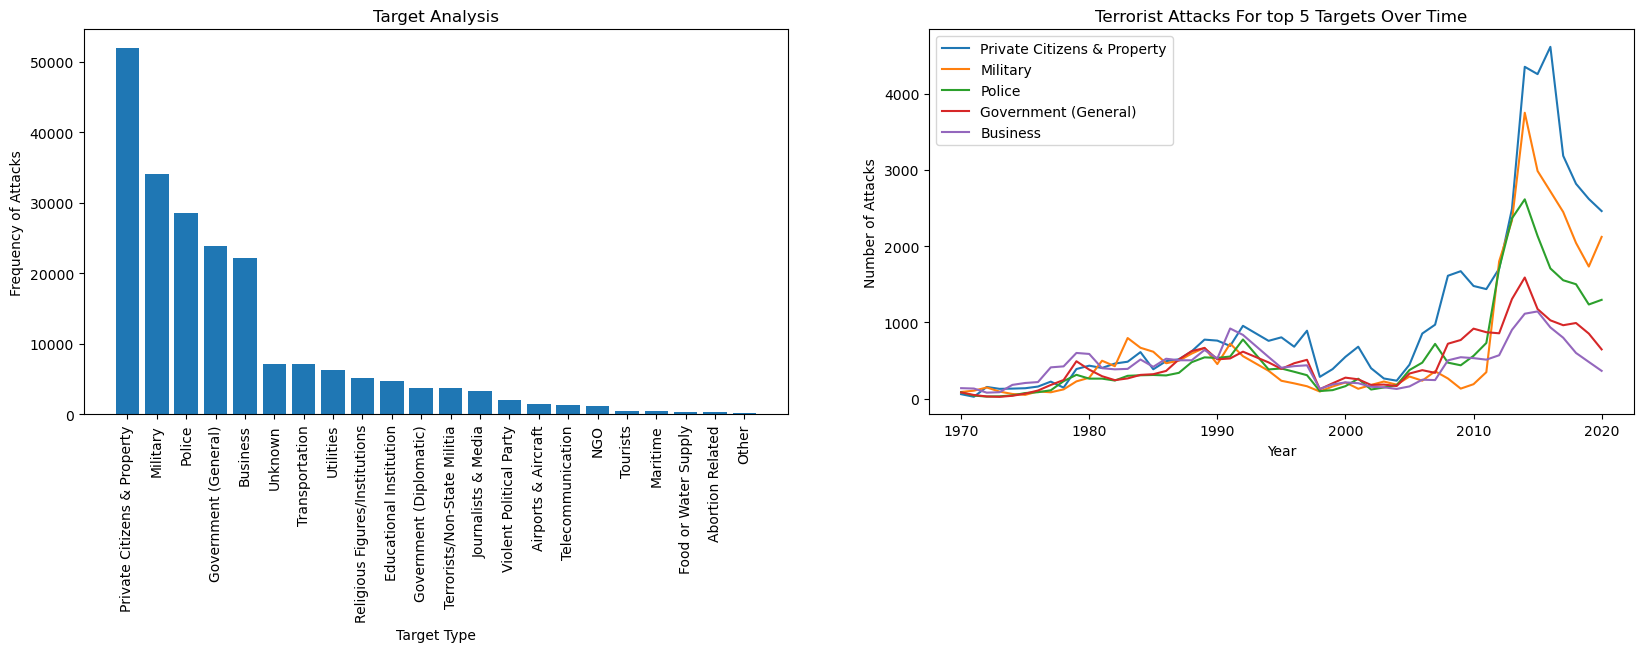

In [27]:
fig, axs = plt.subplots(1, 2, figsize=(20, 5))

# Target analysis
axs[0].bar(terr_by_target.targtype1_txt, terr_by_target.eventid)
axs[0].set_title("Target Analysis")
axs[0].set(xlabel="Target Type", ylabel="Frequency of Attacks")
axs[0].tick_params(axis='x', rotation=90)  # Rotate x-axis labels

# Trend of attacks for top 5 targets
for target in terr_by_target.targtype1_txt[:5]:
    targdf = terrdf[terrdf['targtype1_txt'] == target]
    targdf_by_date = targdf.groupby(targdf['idate'].dt.year).count()['eventid']
    
    axs[1].plot(targdf_by_date.index, targdf_by_date, label=target)

axs[1].set_title("Terrorist Attacks For top 5 Targets Over Time")
axs[1].set(xlabel="Year", ylabel="Number of Attacks")
axs[1].legend()

plt.show()

The top 5 attack targets are Private Citizens & Property, Military, Police, Government (General) and Business

In [30]:
# Checking Independence of Terrorist Groups, Weapon types and Target Type
from scipy.stats import chi2_contingency
crosstab_terrgrp_weaptype = pd.crosstab(terrdf["gname"], terrdf['weaptype1_txt'])

print("-"*20,"Relation Between Terrorist Groups and Weapon types","-"*20)
# Relation Between Terrorist Groups and Weapon types
chi2, pval, degrees_of_freedom, expected_counts = chi2_contingency(crosstab_terrgrp_weaptype)
print(f"Chi-square: {chi2:.2f}, p-value: {pval:.4f}, Degrees of Freedom: {degrees_of_freedom}")
# Interpretation
if pval < 0.05:
    print("Reject null hypothesis: There's a significant association between Terrorist Groups and Weapon Type (p < 0.05).\n")
else:
    print("Fail to reject null hypothesis: Terrorist Groups and Weapon Type might be independent (p >= 0.05).\n")

print("-"*20,"Relation Between Terrorist Groups and Target types","-"*20)
# Relation Between Terrorist Groups and Target types
crosstab_terrgrp_targtype = pd.crosstab(terrdf["gname"], terrdf['targtype1_txt'])
chi2, pval, degrees_of_freedom, expected_counts = chi2_contingency(crosstab_terrgrp_targtype)
print(f"Chi-square: {chi2:.2f}, p-value: {pval:.4f}, Degrees of Freedom: {degrees_of_freedom}")
# Interpretation
if pval < 0.05:
    print("Reject null hypothesis: There's a significant association between Terrorist Groups and Target Type (p < 0.05).")
else:
    print("Fail to reject null hypothesis: Terrorist Groups and Target Type might be independent (p >= 0.05).")

-------------------- Relation Between Terrorist Groups and Weapon types --------------------
Chi-square: 304632.96, p-value: 0.0000, Degrees of Freedom: 40964
Reject null hypothesis: There's a significant association between Terrorist Groups and Weapon Type (p < 0.05).

-------------------- Relation Between Terrorist Groups and Target types --------------------
Chi-square: 503471.52, p-value: 0.0000, Degrees of Freedom: 78204
Reject null hypothesis: There's a significant association between Terrorist Groups and Target Type (p < 0.05).


In [ ]:
# Relation between 


In [ ]:
# Success Rate Over Time: Track the percentage of successful attacks over time.
terr_sucess = pd.DataFrame({'no_of_attacks':terrdf_grp_by_date['eventid'].count(), 'success':terrdf_grp_by_date['success'].sum()})

In [ ]:
terr_sucess['sucess_rate'] = terr_sucess['success'] / terr_sucess['no_of_attacks']
succ_unsucc = [terr_sucess.success.sum() , terr_sucess.no_of_attacks.sum() - terr_sucess.success.sum()]


In [ ]:
# Sucess rate per year

fig, axs = plt.subplots(1, 2, figsize=(12, 5))  # Increase figsize for wider plots
fig.suptitle("Terrorist Success Rate Analysis")

axs[0].plot(terr_sucess.index, terr_sucess.sucess_rate)
axs[0].set_title('Rate of Successful Terrorist Attacks Over the Years')
axs[0].set(xlabel='Years', ylabel='Success Rate')

axs[1].pie(succ_unsucc, labels=[f'Successful\n{succ_unsucc[0]/(succ_unsucc[0] + succ_unsucc[1]) * 100}%', f'Unsuccessful\n{succ_unsucc[1]/(succ_unsucc[0] + succ_unsucc[1]) * 100}%'])
axs[1].set_title('Total Successful/Unsuccessful Attacks')

plt.subplots_adjust(wspace=0.4)  # Add space between subplots
plt.show()


In [ ]:
# 2. Geographical Analysis

#     Regional Distribution: Visualize the number of attacks by region or country using a heatmap or choropleth map to identify hotspots.
#     City-Level Analysis: Determine the cities with the highest number of attacks.
#     Regional Attack Success Rate: Compare the success rates of attacks across different regions or countries

In [ ]:
terr_by_region = terrdf.groupby(by="region_txt")

In [ ]:
terr_by_region.nkill.sum().sort_values(ascending=False)

In [ ]:
plt.subplot()
plt.bar(terr_by_region.nkill.sum().sort_values(ascending=False).index, terr_by_region.nkill.sum().sort_values(ascending=False))
plt.title("Regions with most fatalities")
plt.xlabel("Regions")
plt.ylabel("Number of fatalities")
plt.xticks(rotation=75)
plt.show()

In [ ]:
import plotly
import plotly.express as px

In [ ]:
terr_by_country = terrdf.groupby('country_txt')['eventid'].count()